# Notebook 6
# Events and Assignment 8 - Rössler Attractor

In this notebook we will familiarize you with the concept of event handling in simulations and guide you through the final exercise of sheet 8 on the Rössler Attractor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## `solve_ivp` event handling

In the previous notebooks we used `odeint` to solve ordinary differential equations. Scipy also provides the newer `solve_ivp` as the recommended tool for solving initial value problems. It unfortunately changed the signature of the ODE functions, which makes it less compatible with other tools like root finders.

However, `solve_ivp` provides a range of useful tools, among others, events and dense outputs.

As an example we simulate a bouncing ball under the influence of gravity. It's 1D movement is governed by the following simple ODE:

\begin{align}
\ddot{x} & = -g
\end{align}

At $x=0$ the ball is undergoing elastic collision with the ground and the velocity $v=\dot{x}$ is multiplied by a constant $\epsilon < 0$, with $\left|\epsilon\right|<1$.

First we define the ODE as a python function:

In [2]:
# State vector defined as y = [x,v]

g = 9.81

def ball(t, y):
    dx = y[1]   # dx/dt = v
    dv = -g
    return [dx, dv]

We can simulate the trajectory for a ball dropped from 1m height with an initial upwards velocity:

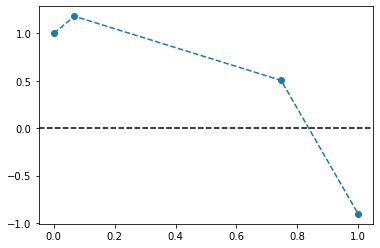

In [3]:
# Parameters
T_max = 1
x0 = 1
v0 = 3

# Solve with auto settings
sol = solve_ivp(ball, [0, T_max], [x0, v0])
plt.plot(sol.t, sol.y[0],'--o')

# Mark ground
plt.axhline(0, linestyle='--',c='k')

If you want to know the solution at intermediate points, there are several options. You could specify specific output points, which the solver will then explicitly output. Note that this does not define the precision of the calculation, only the ouput:

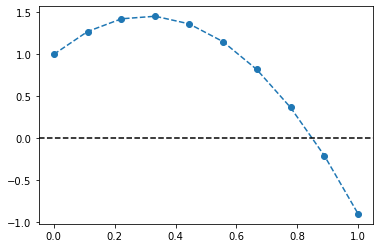

In [4]:
t = np.linspace(0,1,10) # 10 Numbers between 0 and 1

sol = solve_ivp(ball, [0, T_max], [x0, v0], t_eval=t)
plt.plot(sol.t, sol.y[0], '--o')
plt.axhline(0, linestyle='--',c='k')

You can also create a `dense_output` function, which is an interpolant producing the result at any desired point:

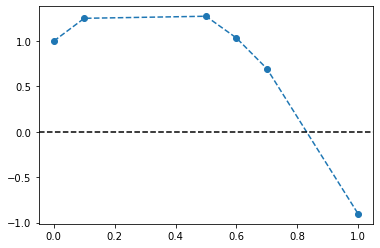

In [5]:
t = [0, 0.1, 0.5, 0.6, 0.7, 1]

sol_dense = solve_ivp(ball, [0, T_max], [x0, v0], dense_output = True)
plt.plot(t, sol_dense.sol(t)[0], '--o')
plt.axhline(0, linestyle='--',c='k')

Now let's introduce events. Events are scalar functions $E(t,\mathbf{y})$ of the current time $t$ and the state vector $\mathbf{y}$. `solve_ivp` applies a root finder onto the event functions and outputs the precise time of the zero crossing.

We define a function to determine the point of zero velocity:

In [6]:
def event_zero_velocity(t,y):
    return y[1] # return v 

We then solve the system for the new event:

In [7]:
my_events = [event_zero_velocity] # List of all events to track

sol_dense = solve_ivp(ball, [0, T_max], [x0, v0],
                      dense_output = True,
                      events = my_events)

Event times are returned as the list `sol_dense.t_events`. We can use the dense output to reproduce the ball's height at the event:

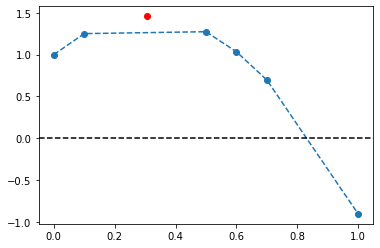

In [8]:
plt.plot(t, sol_dense.sol(t)[0],'--o')

for t_list in sol_dense.t_events:
    plt.scatter(t_list, sol_dense.sol(t_list)[0], c='r')
    
plt.axhline(0, linestyle='--',c='k')

To make the ball bounce off the ground, we define an event for the crossing of the ground plane at $x=0$:

In [9]:
def event_zero_height(t,y):
    return y[0] # return x

Let's check that it's working:

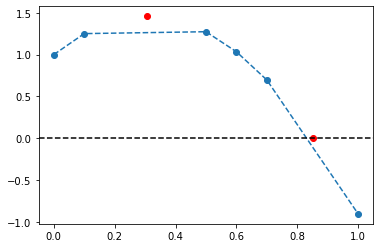

In [10]:
my_events = [event_zero_velocity, event_zero_height] # List of all events to track

sol_dense = solve_ivp(ball, [0, T_max], [x0, v0],
                      dense_output = True,
                      events = my_events)

plt.plot(t, sol_dense.sol(t)[0],'--o')
plt.axhline(0, linestyle='--',c='k')

for t_list in sol_dense.t_events:
    plt.scatter(t_list, sol_dense.sol(t_list)[0], c='r')

We mark `event_zero_height` as *terminal*, which interrupts the solver at the exact moment of the event. We also instruct the solver to only look for zero crossings with negative slope, in case the system will terminate ever so slightly below the surface (because of floating point errors).

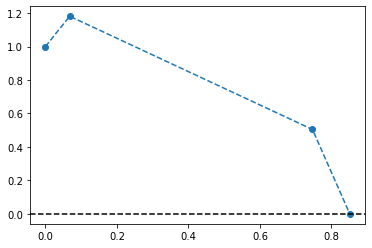

In [11]:
event_zero_height.terminal = True
event_zero_height.direction = -1

sol_dense = solve_ivp(ball, [0, T_max], [x0, v0],
                      events = my_events)

plt.plot(sol_dense.t, sol_dense.y[0],'--o')
plt.axhline(0, linestyle='--',c='k')

Finally, we chain chain the solutions together with a flip of the velocity in between:

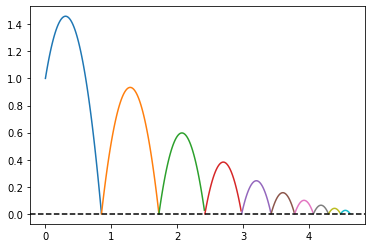

In [12]:
N_hops = 10
t = 0
y0 = [x0, v0]
dt_output = 0.01
epsilon = -0.8

for i in range(N_hops):
    # Save beginning of this leg
    t0_old = t;
    
    # Solve until next terminal event
    sol = solve_ivp(ball, [t, 1e100], y0,
                    events = my_events, dense_output = True)
    
    # Update time
    t = sol.t[-1]
    
    # Create plot times and draw
    t_output = np.arange(t0_old, t, dt_output)
    plt.plot(t_output, sol.sol(t_output)[0])
    
    # New initial conditions and flip velocity
    y0 = sol.y[:,-1]
    y0[1] *= epsilon
    
plt.axhline(0, linestyle='--',c='k')

## Analyzing the Rössler attractor

The Rössler attractor is the strange attractor of the following 3D flow:


\begin{align}
\dot{x} & = -y-z \\
\dot{y} & = x+ay \\
\dot{z} & = b+z(x-c)
\end{align}

We choose $a=b=0.1$ and $c=14$.

### a) Function definition

Define a python function to describe the ODE:

In [13]:
a = ; b = ; c = 

def rössler(t,y):
    # Do stuff here ???

SyntaxError: invalid syntax (262421295.py, line 1)

### b) Visualization

Start with $x=y=z=1$ and simulate the trajectory for 2000 time units. If you want to get a smooth graphic you can simply pass `max_step=0.05` to the solver, or use the other methods discussed previously.

In [14]:
sol = solve_ivp(rössler, ???, max_step=0.05)

SyntaxError: invalid syntax (1923419471.py, line 1)

Plot the result in a $(x, y+z)$ coordinate system. This will give you a basic *"3D"* look at the attractor. Pass `linedwidth=0.05` to the plotting command to reduce the line drawing density. If you want a "true" 3D plot, have a look at the [mplot3d tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) and use the `%matplotlib notebook` magic to get an interactive plot widget in Jupyter.

In [ ]:
plt.plot(???)

plt.xlabel("X")
plt.ylabel("Y+Z")

### c) Finding the maxima

We will do a Poincare cut at the highest point of the arc in $z$-direction. Write a function that outputs the $z$-derivative. A maximum occurs when this function crosses zero with a negative slope:

In [ ]:
def maximum(t, y):
    # do stuff ???
    
maximum.direction = -1 # Ignore minimums

Solve the system again, now whilst finding the events. You receive the event times as the list `sol.t_events[0]`. Recover the system state at the event times (from the dense output for example).

In [ ]:
sol = solve_ivp(rössler, ???, events = maximum, max_step=0.05)

t_maximum = sol.t_events[0]
y_events = ???

Draw the $(x, y+z)$ plot again, now marking the maximum events:

In [ ]:
plt.plot( ?same as before? )
plt.scatter( ?draw maxima here? , s=0.1, color='r')

plt.xlabel("X")
plt.ylabel("Y+Z")

### d) Recurrence map

Make a scatter plot between the heights of the maximums $z_n$ and the height of the following maximum $z_{n+1}$.

In [ ]:
plt.scatter( ???, s=1)

plt.xlabel("z_n")
plt.ylabel("z_(n+1)")

Explain the concept of *stretch and fold* in this plot and how it relates to the chaotic behaviour of the attractor.